# Análise de Dados

In [37]:
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualization
import numpy as np # linear algebra
import matplotlib.pyplot as plt # chart

In [38]:
df = pd.read_csv('Uber_Ride_Reviews.csv')

In [39]:
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


* ride_rating -> estrelas de qualificação do Uber
* estrelas de qualificação < 3 são classificadas como comentarios negativos
* estrelas de qualificação >= 3 são classificadas como comentarios positivos
* sentiment = 0 -> Comentario com um sentimento negativo
* sentiment = 1 -> Comentario com um sentimento positivo

# Comentarios Negativos

In [40]:
data = df[df['sentiment'] == 0]

In [41]:
data.head(10)

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0
5,I damage vehicle due Uber driver upstairs neig...,1.0,0
6,I use Uber fairly frequently Overall good serv...,2.0,0
7,Last night I returned home airport using Uber ...,1.0,0
8,Do lose anything Uber otherwise experience nig...,1.0,0
9,My last experiences Uber made use taxis turned...,1.0,0


# Comentario Negativo

In [42]:
data['ride_review'][5]

'I damage vehicle due Uber driver upstairs neighbor used The trim rear wheel well broke The driver leave note He kept calling neighbor Now answer phone Ca get number Uber locate driver'

# Comentarios Positivos

In [43]:
data_pos = df[df['sentiment'] != 0]

In [44]:
data_pos.head(10)

,ride_review,ride_rating,sentiment
11,time I extremely satisfied pet gripes No flat ...,3.0,1
19,We used Uber times week Orlando vacation inste...,4.0,1
33,The navigation system great India driver selec...,4.0,1
35,Uber rides always convenient plentiful prompt ...,5.0,1
37,I positive experience Uber company I contact I...,5.0,1
40,Found California emergency trip without transp...,5.0,1
43,I limited really optimal experiences I use ser...,5.0,1
44,Used Uber times Miami January Twice drivers go...,3.0,1
45,I Uber driver short time passengers said posit...,5.0,1
46,Love Uber First time user impressed reasonable...,5.0,1


# Comentario Positivo

In [49]:
data_pos['ride_review'][11]

'time I extremely satisfied pet gripes No flat rate airport taxis limos From JFK got stuck midtown tunnel fare time distance almost twice flat taxi fare The driver profile indicate FasTrak transponder Coming LAX DTLA two occasions stuck traffic driver FasTrak use express lanes When driver accepts request snapshot description name make car license etc also Can use FasTrak express lanes I know reject pickup driver lack FasTrak Another solution option profile preferences accept drivers Drivers often know city relying much GPS unaware surroundings Taxi drivers seem know popular destinations way get depending conditions whereas Uber drivers usually like little automatons staring GPS unaware Waze sending us unnecessary detour I recently ride Broad Museum downtown LA home miles away The driver never heard GPS I told Bunker Hill next Walt Disney Concert Hall The Music Center near County Courthouse never heard Those iconic landmarks nobody allowed drive Uber know fundamental layout city landmar

In [50]:
df.count()

ride_review    1344
ride_rating    1344
sentiment      1344
dtype: int64

In [51]:
df.groupby(['sentiment']).size()

sentiment
0    1111
1     233
dtype: int64

# Modelos 

In [52]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, make_scorer

# Função para a limpeza dos dados

In [53]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import RSLPStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed = nltk.stem.SnowballStemmer("english")
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
def normalizer(depoimentos):
    depoimentos = " ".join(filter(lambda x: x[0]!= '@' , depoimentos.split()))
    depoimentos = re.sub('[^a-zA-Z]', ' ', depoimentos)
    depoimentos = depoimentos.lower()
    depoimentos = depoimentos.split()
    depoimentos = [stemmer.stem(word) for word in depoimentos]
    depoimentos = [word for word in depoimentos if not word in set(stopwords.words('english'))]
    depoimentos = " ".join(depoimentos)
    return depoimentos

##### Limpeza dos dados

In [55]:
df['ride_review'] = df.ride_review.apply(normalizer) 

#### Dado Antes da limpeza : Comentario negativo

In [59]:
data['ride_review'][5]

'I damage vehicle due Uber driver upstairs neighbor used The trim rear wheel well broke The driver leave note He kept calling neighbor Now answer phone Ca get number Uber locate driver'

#### Dado Depois da limpeza : Comentario negativo

In [56]:
df['ride_review'][5]

'damag vehicl due uber driver upstair neighbor use trim rear wheel well broke driver leav note kept call neighbor answer phone ca get number uber locat driver'

#### Dado Antes da limpeza : Comentario positivo

In [58]:
data_pos['ride_review'][11]

'time I extremely satisfied pet gripes No flat rate airport taxis limos From JFK got stuck midtown tunnel fare time distance almost twice flat taxi fare The driver profile indicate FasTrak transponder Coming LAX DTLA two occasions stuck traffic driver FasTrak use express lanes When driver accepts request snapshot description name make car license etc also Can use FasTrak express lanes I know reject pickup driver lack FasTrak Another solution option profile preferences accept drivers Drivers often know city relying much GPS unaware surroundings Taxi drivers seem know popular destinations way get depending conditions whereas Uber drivers usually like little automatons staring GPS unaware Waze sending us unnecessary detour I recently ride Broad Museum downtown LA home miles away The driver never heard GPS I told Bunker Hill next Walt Disney Concert Hall The Music Center near County Courthouse never heard Those iconic landmarks nobody allowed drive Uber know fundamental layout city landmar

#### Dado Depois da limpeza : Comentario positivo

In [57]:
df['ride_review'][11]

'time extrem satisfi pet gripe flat rate airport taxi limo jfk got stuck midtown tunnel fare time distanc almost twice flat taxi fare driver profil indic fastrak transpond come lax dtla two occas stuck traffic driver fastrak use express lane driver accept request snapshot descript name make car licens etc also use fastrak express lane know reject pickup driver lack fastrak anoth solut option profil prefer accept driver driver often know citi reli much gp unawar surround taxi driver seem know popular destin way get depend condit wherea uber driver usual like littl automaton stare gp unawar waze send us unnecessari detour recent ride broad museum downtown la home mile away driver never heard gp told bunker hill next walt disney concert hall music center near counti courthous never heard icon landmark nobodi allow drive uber know fundament layout citi landmark uber app iphon hog much memori limit storag capac phone review remov item uber app one biggest app remov comparison lyft app'

In [61]:
df.head()

,ride_review,ride_rating,sentiment
0,complet run new york marathon request uber poo...,1.0,0
1,appoint time auto repair requir earli avail me...,1.0,0
2,whether use uber ride servic uber eat order fo...,1.0,0
3,whi hard understand tri retriev uber cab email...,1.0,0
4,south beach fl stay major hotel order uber dri...,1.0,0


# Treino e Teste

In [62]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer
import itertools

In [68]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=3, alpha=.3, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color = "red", label = "negative")
            blue_patch = mpatches.Patch(color = 'blue',label = 'positive')
            plt.legend(handles=[red_patch, blue_patch], prop={'size': 20})

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter): 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title, fontsize=30) 
    plt.colorbar() 
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, fontsize=20) 
    plt.yticks(tick_marks, classes, fontsize=20) 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color= "white" if cm[i, j] < thresh else "black", fontsize=30) 
    plt.tight_layout() 
    return plt


def confusion(target, pred):
    cm = confusion_matrix(target, pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['negative','positive'], normalize=False, title='Confusion matrix')
    plt.show()

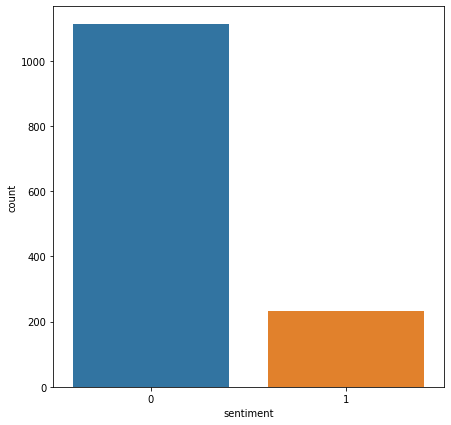

In [64]:
fig = plt.figure(figsize=(7, 7))  
sns.countplot(x='sentiment', data=df);

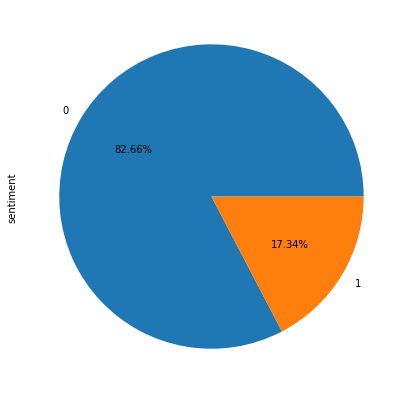

In [65]:
fig = plt.figure(figsize=(7, 7))   
df.sentiment.value_counts().plot(kind='pie', autopct='%.2f%%')

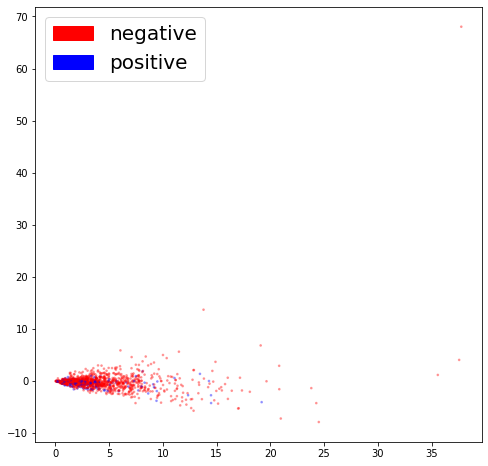

In [69]:
count = CountVectorizer(ngram_range = (1,3))
xtrain_matrix = count.fit_transform(df.ride_review)
ytrain_matrix = df.sentiment
fig = plt.figure(figsize=(8, 8))   
plot_LSA(xtrain_matrix,ytrain_matrix)

In [70]:
X = df['ride_review']
y = df['sentiment']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [72]:
vectorizer = CountVectorizer(ngram_range = (1,3))
#vectorizer = TfidfVectorizer(min_df=10) resultado final piora
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Modelo: Máquinas de Vetores de Suporte - SVC

In [42]:
from sklearn.svm import SVC

In [43]:
param_grid = {'C':[10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001], 'kernel':['linear','rbf']}
gridSVC = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
gridSVC.fit(X_train,y_train)

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.6s
[CV] C=10, gamma=1, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.6s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.6s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.8s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.6s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.6s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ................... C=100, gamma=1e-05, kernel=rbf, total=   0.5s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.5s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   51.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [44]:
gridSVC.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

# Validação

In [45]:
svc = SVC(C = 100 , gamma=0.001 , kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(metrics.classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9009    0.9414    0.9207       222
           1     0.6486    0.5106    0.5714        47

    accuracy                         0.8662       269
   macro avg     0.7748    0.7260    0.7461       269
weighted avg     0.8568    0.8662    0.8597       269



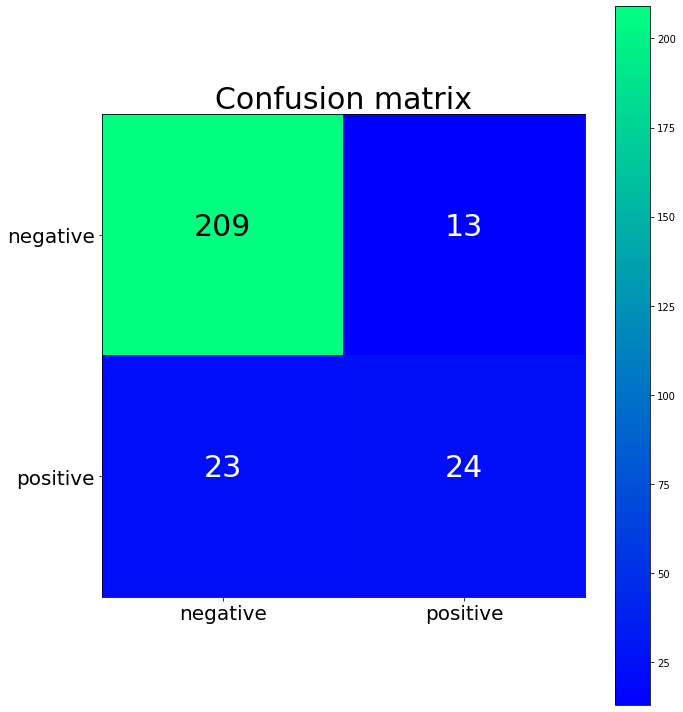

None


In [46]:
print(confusion(y_test, y_pred))

# Modelo: Regressão Linear Logística

In [47]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train, y_train)

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Validação

In [48]:
pred = model.predict(X_test)

In [49]:
print(metrics.classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.8852    0.9730    0.9270       222
           1     0.7600    0.4043    0.5278        47

    accuracy                         0.8736       269
   macro avg     0.8226    0.6886    0.7274       269
weighted avg     0.8634    0.8736    0.8573       269



In [50]:
grid={"C":np.logspace(0, 4, 10), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv= GridSearchCV(LogisticRegression() , grid , cv=10, scoring=make_scorer(f1_score, average='weighted'))
logreg_cv.fit(X_train,y_train)

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [51]:
# View best hyperparameters
print(logreg_cv.best_params_)

{'C': 7.742636826811269, 'penalty': 'l2'}


# Validação

In [73]:
model = LogisticRegression(penalty="l2", C= 7.742636826811269)
model.fit(X_train, y_train)

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred = model.predict(X_test)

              precision    recall  f1-score   support

           0     0.8945    0.9550    0.9237       222
           1     0.6875    0.4681    0.5570        47

    accuracy                         0.8699       269
   macro avg     0.7910    0.7115    0.7404       269
weighted avg     0.8583    0.8699    0.8597       269



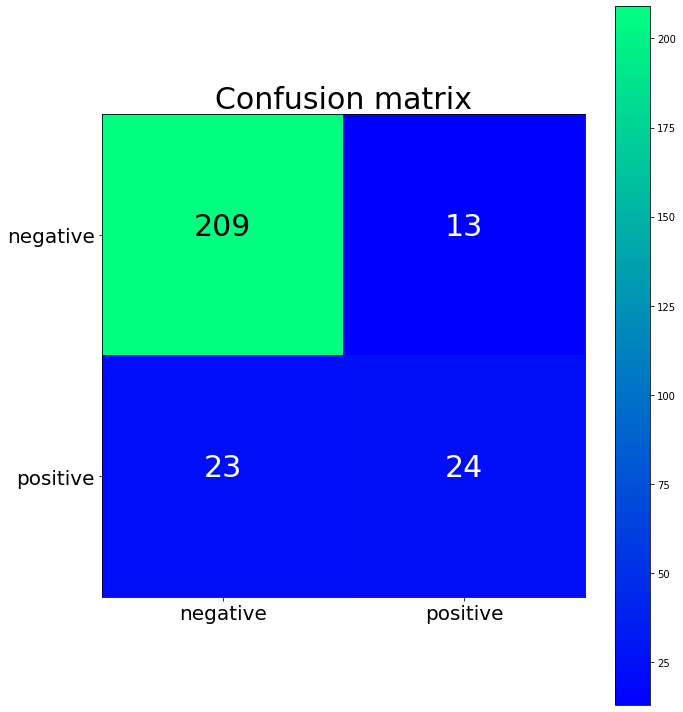

None


In [54]:
print(metrics.classification_report(y_test,pred,digits=4))
print(confusion(y_test, y_pred))

# Modelo: Multinomial Naive Bayes

In [55]:
gaussian = MultinomialNB()

In [56]:
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)

# Validação

              precision    recall  f1-score   support

           0     0.8315    1.0000    0.9080       222
           1     1.0000    0.0426    0.0816        47

    accuracy                         0.8327       269
   macro avg     0.9157    0.5213    0.4948       269
weighted avg     0.8609    0.8327    0.7636       269



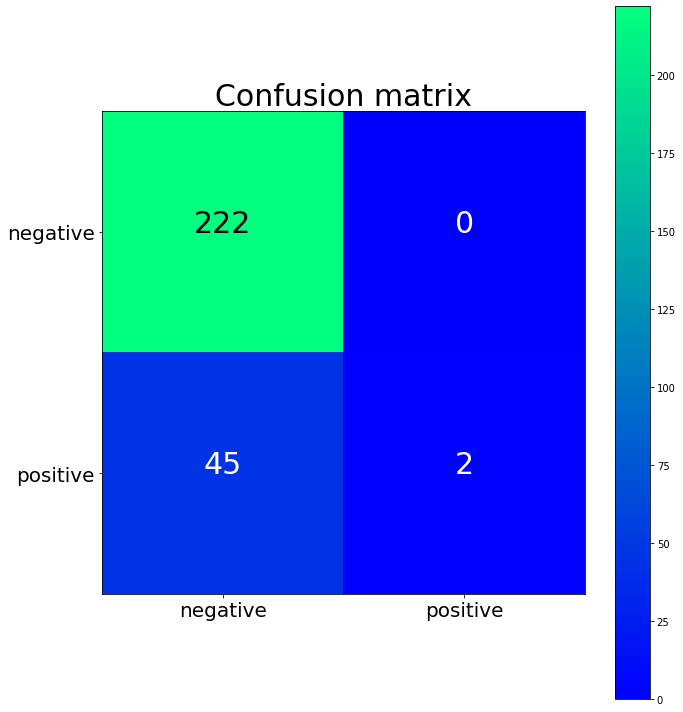

None


In [57]:
print(metrics.classification_report(y_test, y_pred,digits=4))
print(confusion(y_test, y_pred))

# Modelo: Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gridTree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring=make_scorer(f1_score, average='weighted'))
gridTree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,

In [60]:
# View best hyperparameters
print(gridTree.best_params_)

{'criterion': 'gini', 'max_depth': 15}


# Validação

In [61]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [62]:
print(metrics.classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.8903    0.9505    0.9194       222
           1     0.6562    0.4468    0.5316        47

    accuracy                         0.8625       269
   macro avg     0.7733    0.6986    0.7255       269
weighted avg     0.8494    0.8625    0.8516       269



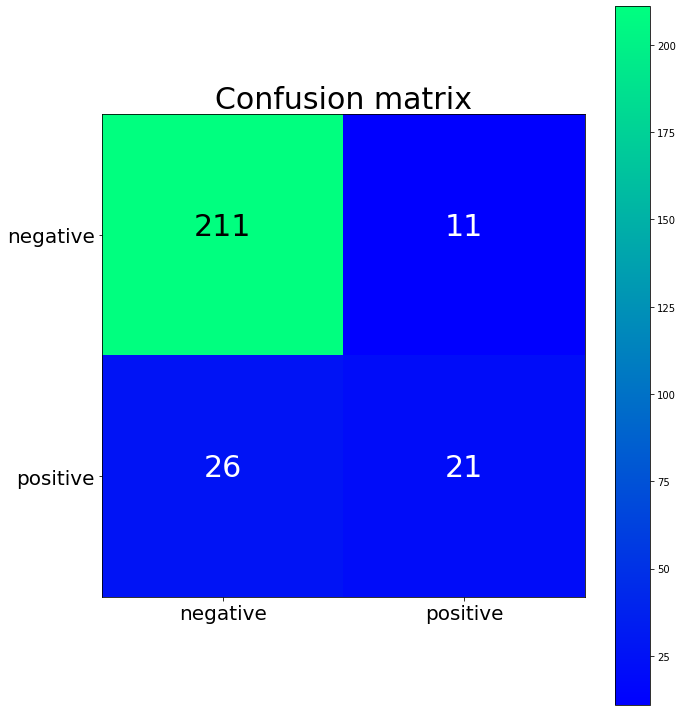

None


In [63]:
print(confusion(y_test, y_pred))

In [64]:
print('FIM')

FIM
